In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

Importing the dataset

In [58]:
dataset = pd.read_csv('D:/FSDS-iNeuron/3.Resource/Dataset/Algerian_forest_fires_dataset_UPDATE.csv', header=[1])

##### Top 5 rows

In [59]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [60]:
df = dataset

##### Columns of the dataset

In [61]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

Observation :
- There are spaces in the column names

#####  Trimming the space from column names

In [62]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [63]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       nan, 'Classes  ', 'not fire     ', 'not fire    '], dtype=object)

##### Trimming the values in 'Classes' column

In [64]:
df['Classes'] = df['Classes'].str.strip()

##### Shape of the dataframe

In [65]:
df.shape

(246, 14)

##### dropping the un-required rows

In [66]:
df.drop([122,123], axis=0, inplace=True)

In [67]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


##### Adding a new column as Region

In [68]:
df.loc[:122, 'Region'] = 'Bejaia'
df.loc[122:, 'Region'] = 'Sidi-Bel Abbes'
df['Region'] = df['Region'].map({'Bejaia':1, 'Sidi-Bel Abbes':0})
df['Region']

#for index in range(df.shape[0]):
#    if index < 122 :
#        df.loc[index, 'region'] = 0
#    else:
#        df.loc[index, 'region'] = 1

0      1
1      1
2      1
3      1
4      1
      ..
241    0
242    0
243    0
244    0
245    0
Name: Region, Length: 244, dtype: int64

##### Replacing the 'Classes' column categorical value with numerical values

In [69]:
df['Classes'] = df['Classes'].map({'not fire':0, 'fire':1})

In [70]:
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

##### Handling value '14.6 9' in the feature DC

In [71]:
df['DC'] = df['DC'].str.split(' ').str[0]

##### Handling value 'fire' in column 'FWI'

In [72]:
df['FWI'] = df['FWI'].str.replace('fire','0')

In [73]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,1


##### Basic information about dataset

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    float64
 14  Region       244 non-null    int64  
dtypes: float64(1), int64(1), object(13)
memory usage: 38.6+ KB


Observation :
- Except 'Classes' and 'Region' all the columns are of object type

##### Converting the datatypes of the columns

In [75]:
df = df.astype({'day':int, 'month':int, 'year':int, 'Temperature':float, 'RH':int, 
                'Ws':int, 'Rain':float, 'FFMC':float, 'DMC':float, 'DC':float, 'ISI':float, "BUI":float, 'FWI':float})

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    float64
 14  Region       244 non-null    int64  
dtypes: float64(9), int32(5), int64(1)
memory usage: 33.8 KB


### Feature Information

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations
    
Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90 (Relative humidity (RH) is a measure of how much moisture is in the air)

Ws :Wind speed in km/h: 6 to 29 (wind speed)

Rain: total day in mm: 0 to 16.8 (Rain in a day in mm)

FWI(Fire Weather Index) Components : 0 to 31.1

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 (numerical rating of the moisture content of litter and cured fine fuels)

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 (The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth)

Drought Code (DC) index from the FWI system: 7 to 220.4 (The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers)

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 (Initial Spread Index is a relative measure of how quickly a fire can be expected to spread)

Buildup Index (BUI) index from the FWI system: 1.1 to 68 (It is a numeric rating of the total amount of fuel available for combustion)

Fire Weather Index (FWI) Index: 0 to 31.1 (The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.)

Classes: two classes, namely as fire and as not fire (Result)

Region : There are two regions in the dataset Bejaia Region represented by 1 and Sidi Bel-Abbes Region represented by 1

##### Replacing unnecessary features day, month & year with a new feature 'Date'

In [77]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [78]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1,2012-06-01
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1,2012-06-02


##### Column names

In [79]:
df.keys()

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region', 'date'],
      dtype='object')

##### Output feature

In [80]:
df['Temperature']

0      29.0
1      29.0
2      26.0
3      25.0
4      27.0
       ... 
241    30.0
242    28.0
243    27.0
244    24.0
245    24.0
Name: Temperature, Length: 244, dtype: float64

##### Define the numerical and Categorical columns

In [81]:
df_num = [feature for feature in df.columns if df[feature].dtypes != 'object']
df_cat = [feature for feature in df.columns if df[feature].dtypes == 'object']

In [82]:
df_cat

[]

Observation :
- We have 0 categorical columns

In [83]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.006557,0.563786,0.500000
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.438889,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000,0.500000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


Observation :
- Rain, DMC, DC, ISI, BUI, FWI columns has outliers

##### Check null values

In [84]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
date           0
dtype: int64

Observation :
    

In [85]:
df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])

### EDA

## Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable/feature.

<AxesSubplot:xlabel='Temperature'>

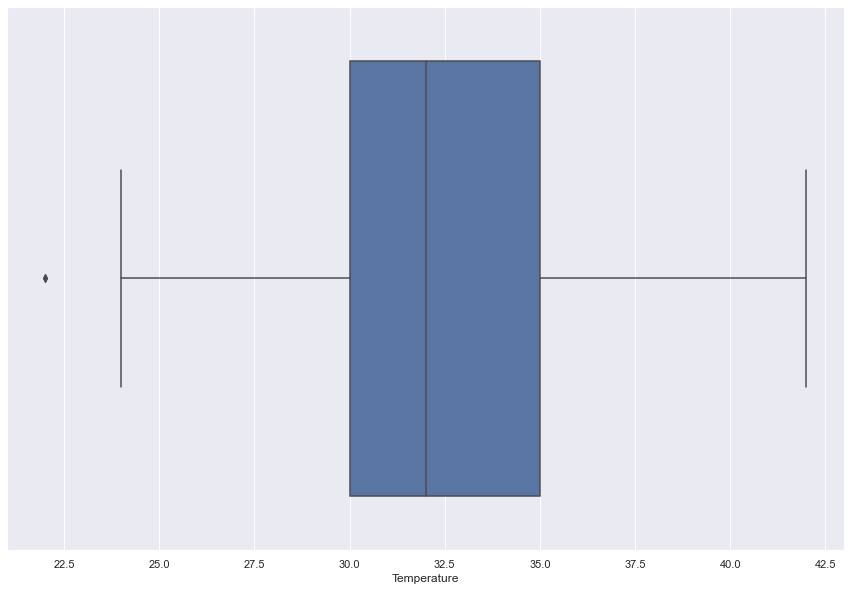

In [86]:
sns.boxplot(df['Temperature'])

<AxesSubplot:xlabel='Ws'>

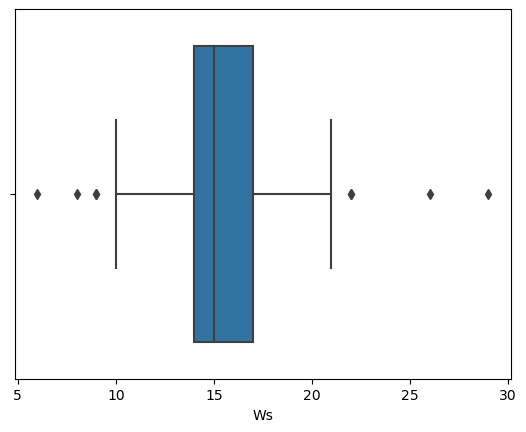

In [127]:
sns.boxplot(df['Ws'])

In [87]:
df.var()

Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.632245
ISI              17.433281
BUI             201.777024
FWI              55.337076
Classes           0.246711
Region            0.251029
dtype: float64

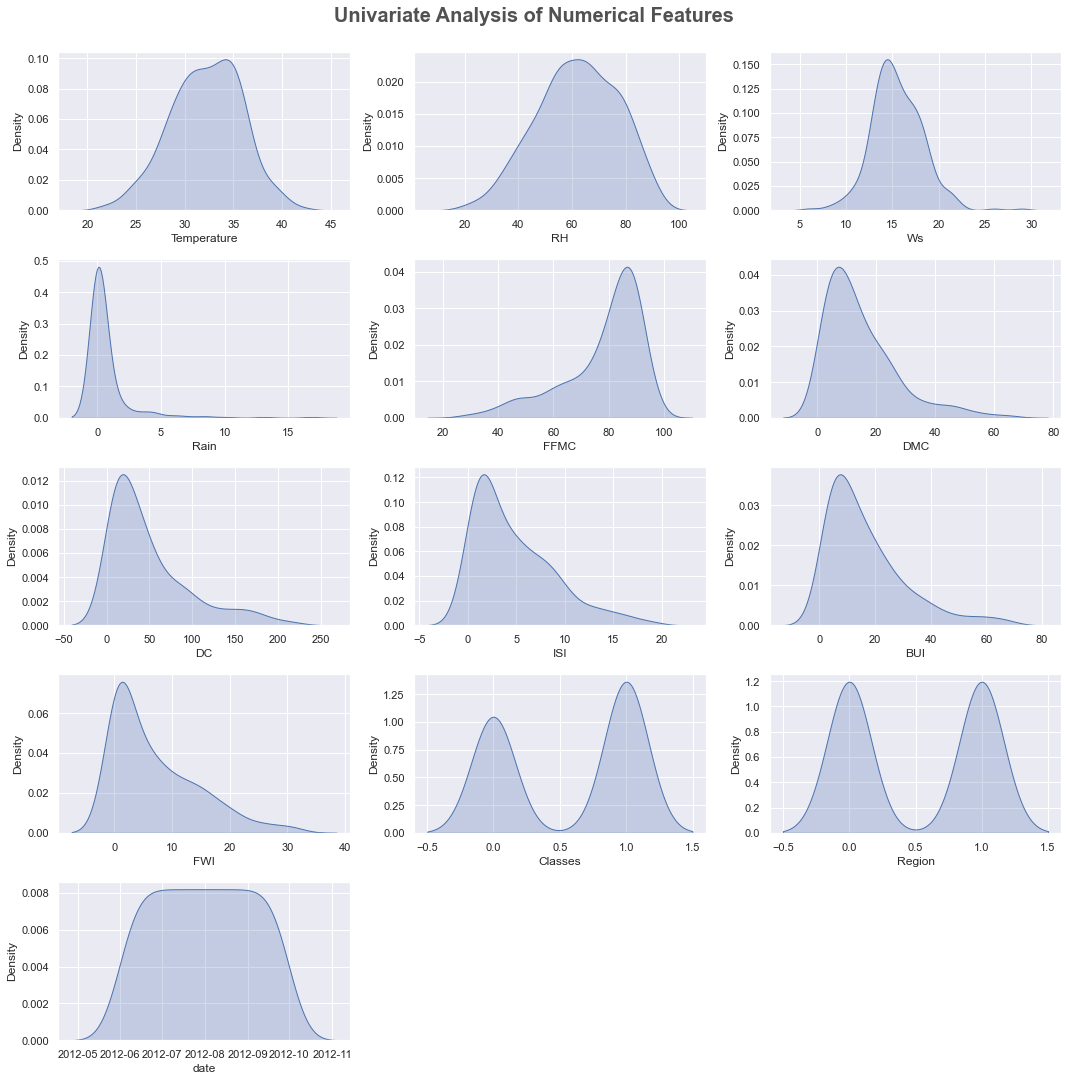

In [88]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df_num)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[df_num[i]], shade=True, color='b')
    plt.xlabel(df_num[i])
    plt.tight_layout()

#### Observations :
- Rain, DMC, DC, ISI, BUI, FWI are Right Skewed or Positively Skewed.
- FFMC is Left Skewed or Negatively Skewed.
- Ws is slightly Right Skewed
- RH is slightly Left skewed
- In Rain, FMCC, DMC, DC, ISI, FWI features there are more outliers

### Bivariate Analysis
Bivariate analysis is the analysis of two variables to find out relationship between them.

##### Line plot

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

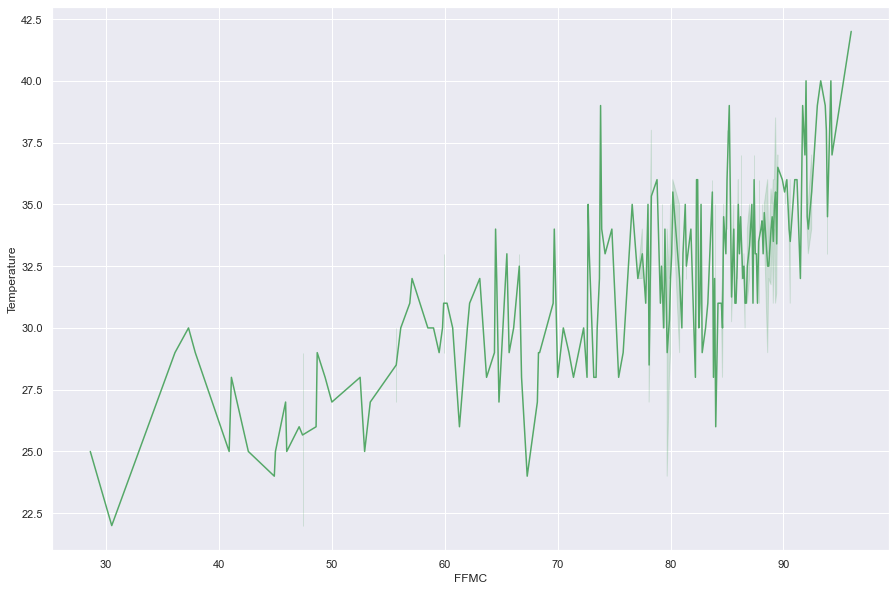

In [89]:
sns.lineplot(x='FFMC', y='Temperature', data=df, color='g')

<AxesSubplot:xlabel='Rain', ylabel='Temperature'>

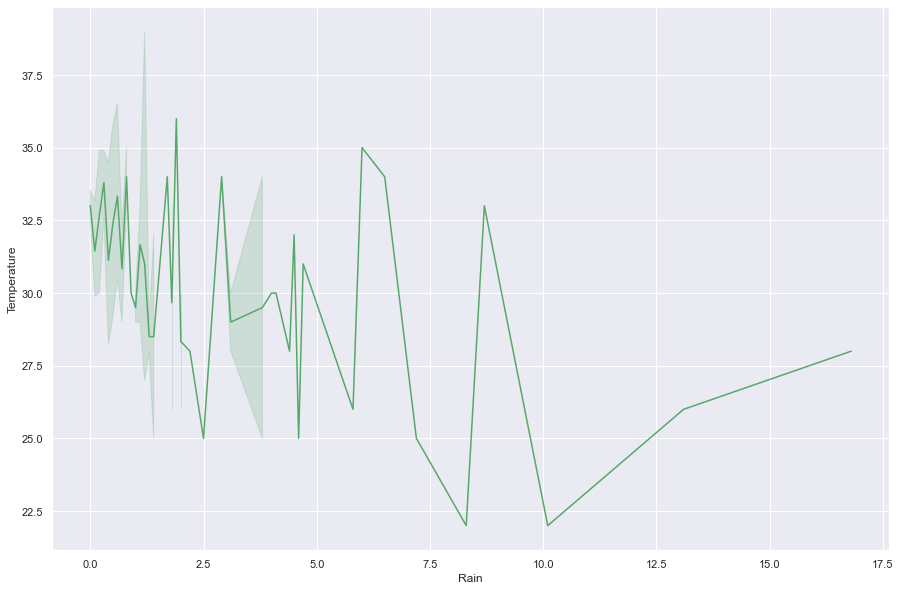

In [90]:
sns.lineplot(x='Rain', y='Temperature', data=df, color='g')

##### Joint plot

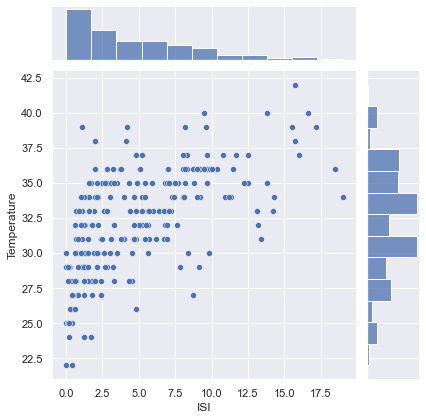

In [91]:
sns.jointplot(x='ISI', y='Temperature', data=df, color='b')

In [92]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1,2012-06-01
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1,2012-06-02
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1,2012-06-03
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1,2012-06-04
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,30.0,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,0,2012-09-26
242,28.0,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,0,2012-09-27
243,27.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,0,2012-09-28
244,24.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,0,2012-09-29


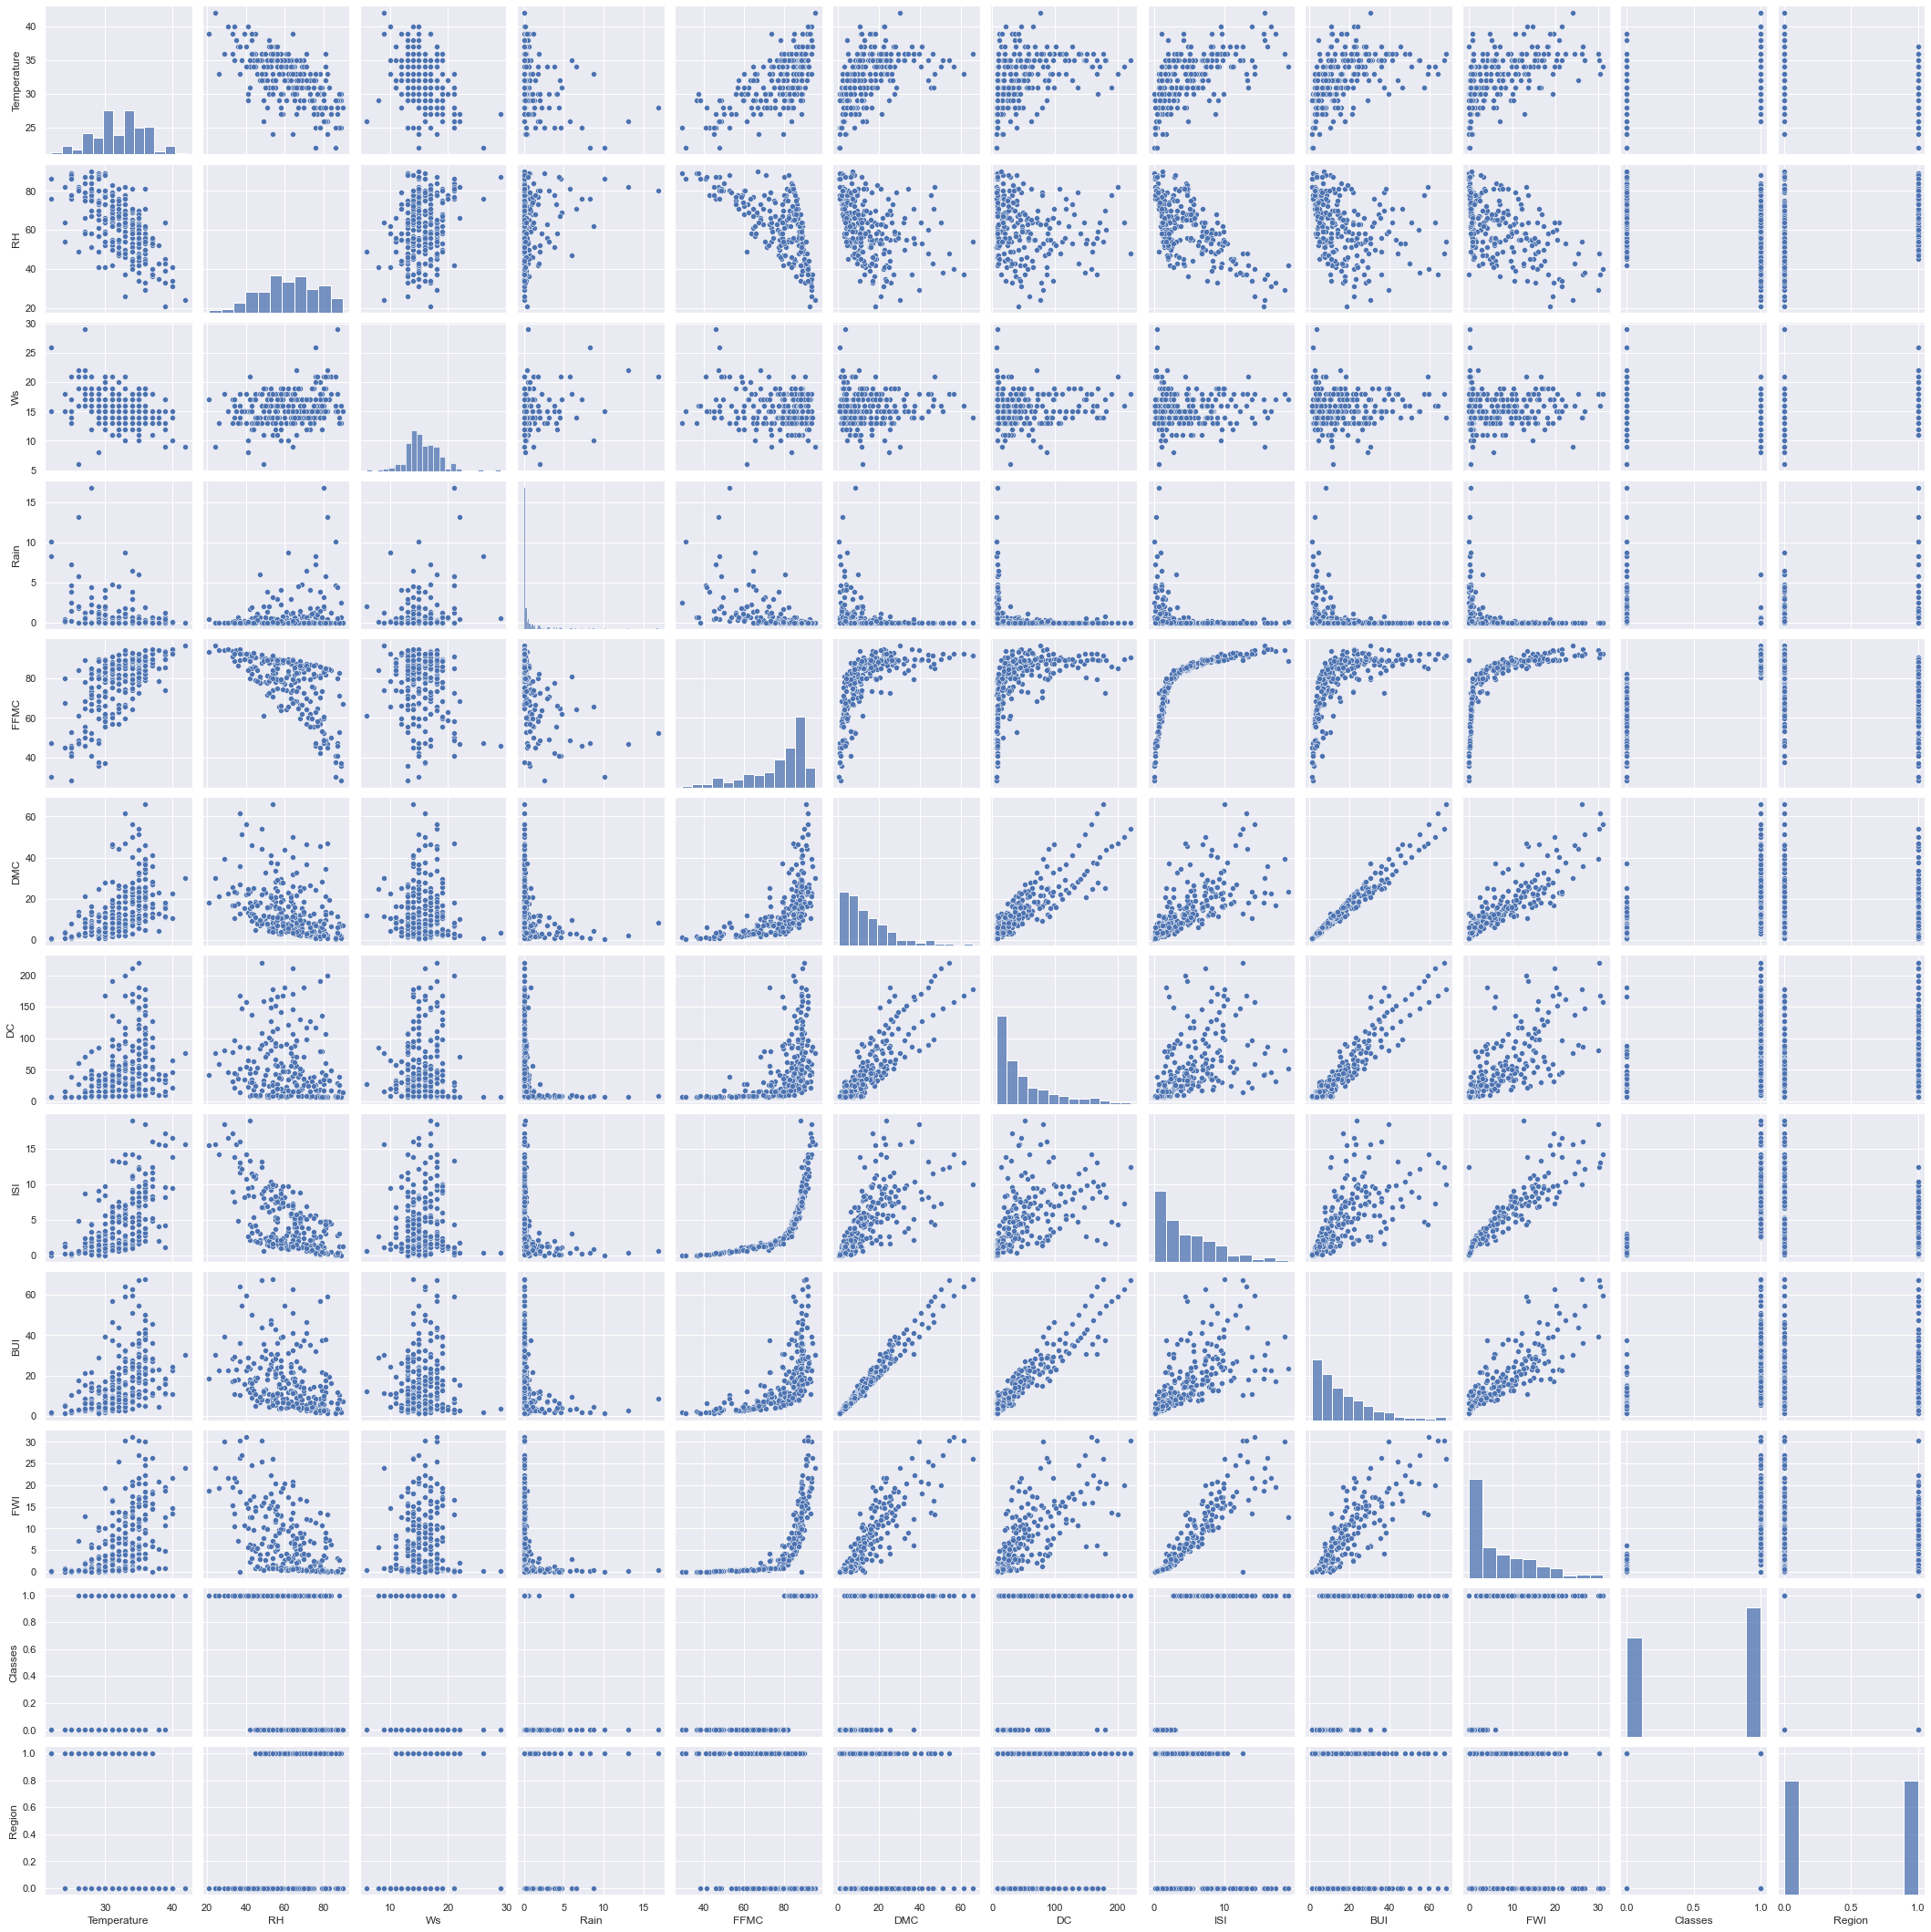

In [93]:
sns.pairplot(df)

Observation :

### Multivariate Analysis

##### Finding multi-colinearity between features

In [94]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.558393,0.518119,-0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.569997,-0.435023,0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.028799,-0.066529,0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.322682,-0.379449,0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.686033,0.770114,-0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.874778,0.584188,-0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.740189,0.507122,0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.907461,0.735511,-0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857771,0.583882,-0.087370
FWI,0.558393,-0.569997,0.028799,-0.322682,0.686033,0.874778,0.740189,0.907461,0.857771,1.000000,0.713357,-0.192451


Observation :
- Temperature and RH are negatively correlated
- Temperature and FFMC are positively correlated
- Temperature and ISI are positively correlated

Observation :
There is a outlier in the left lower side of the 'Temperature feature

<AxesSubplot:>

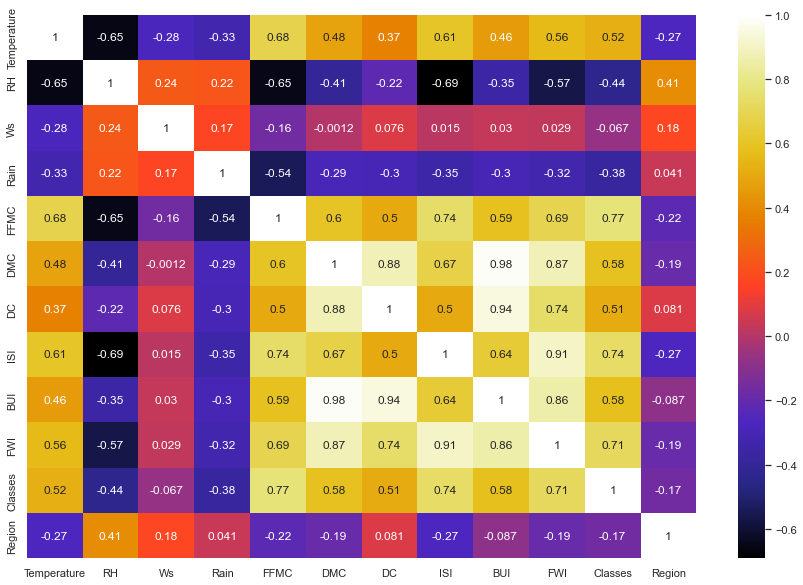

In [95]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(), cmap='CMRmap', annot=True)

In [96]:
continuous_features = [feature for feature in df.columns if df[feature].dtype == 'float']
continuous_features

['Temperature', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>,
        <AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>],
       [<AxesSubplot:title={'center':'date'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

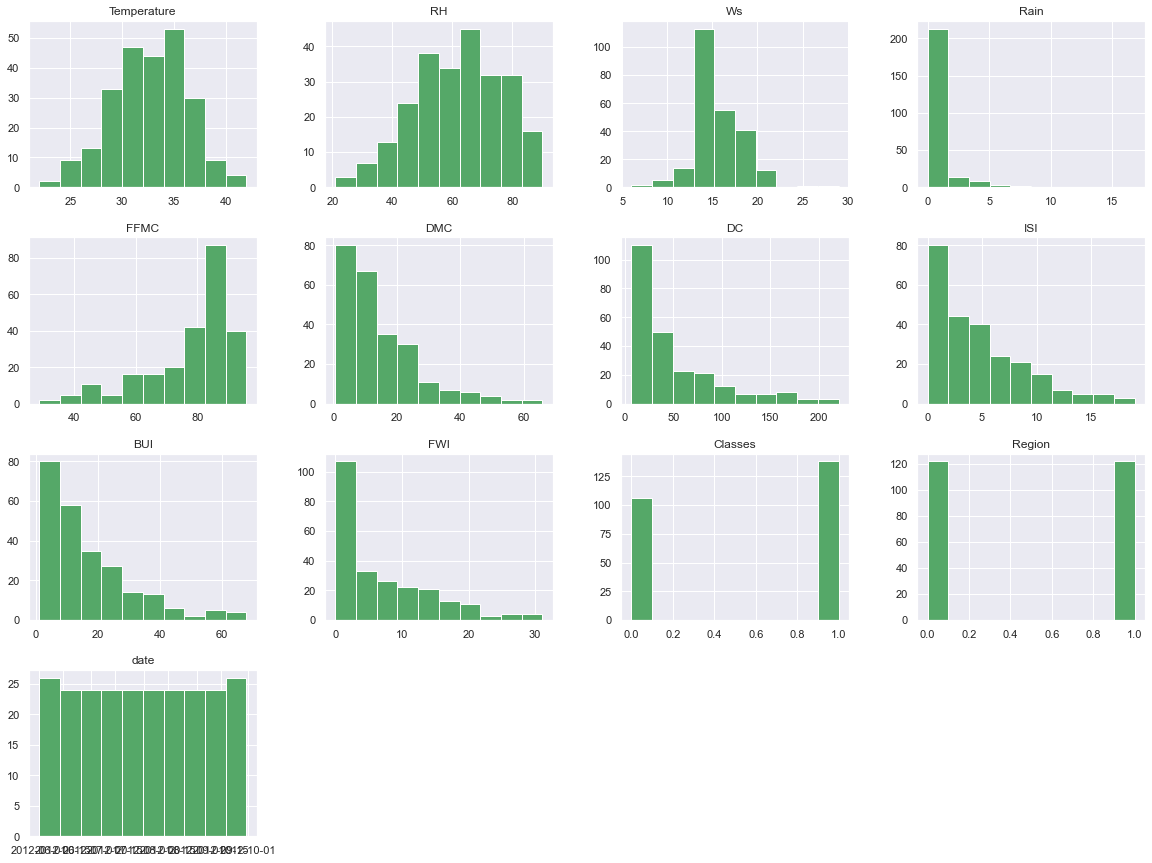

In [97]:
# plotting histogram

df.hist(figsize=(20,15), color='g')

##### Bar graph

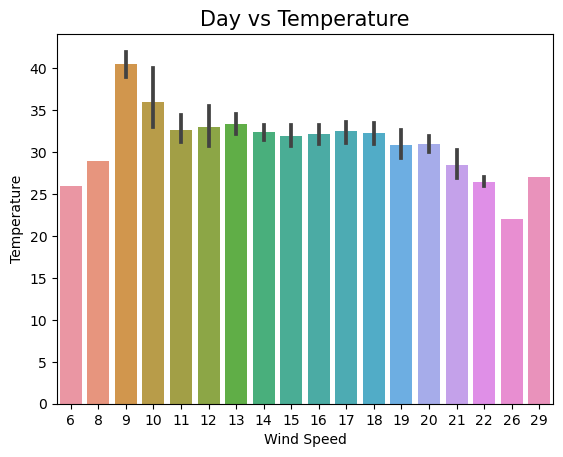

In [126]:
plt.style.use('default')
sns.barplot(x='Ws', y='Temperature', data=df)
plt.title('Day vs Temperature', fontsize=15)
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.show()

Text(0, 0.5, 'Temperature')

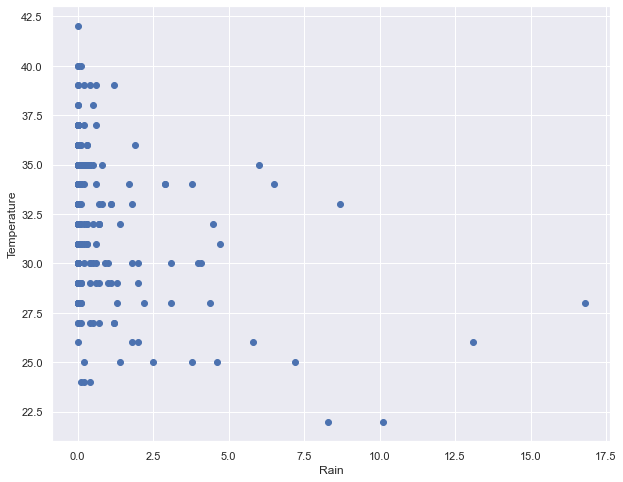

In [98]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['Rain'], df['Temperature'])
plt.xlabel('Rain')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

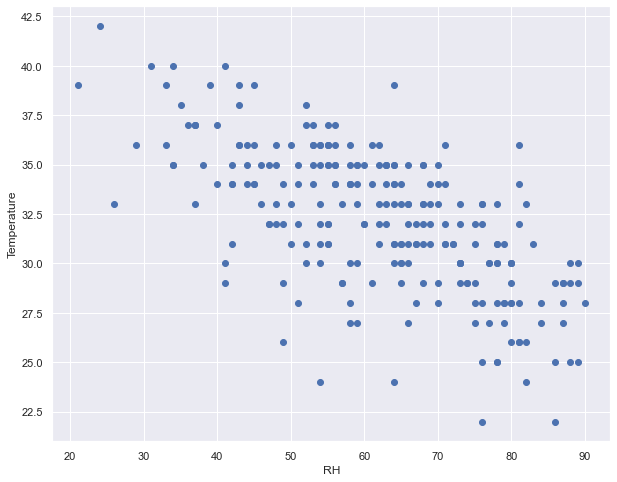

In [99]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['RH'], df['Temperature'])
plt.xlabel('RH')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

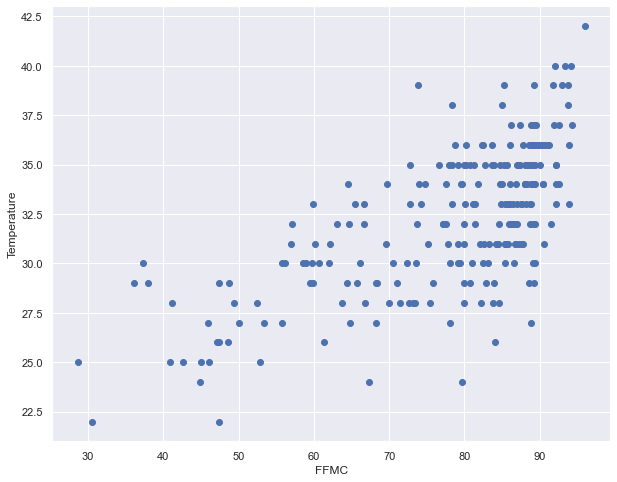

In [100]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['FFMC'], df['Temperature'])
plt.xlabel('FFMC')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

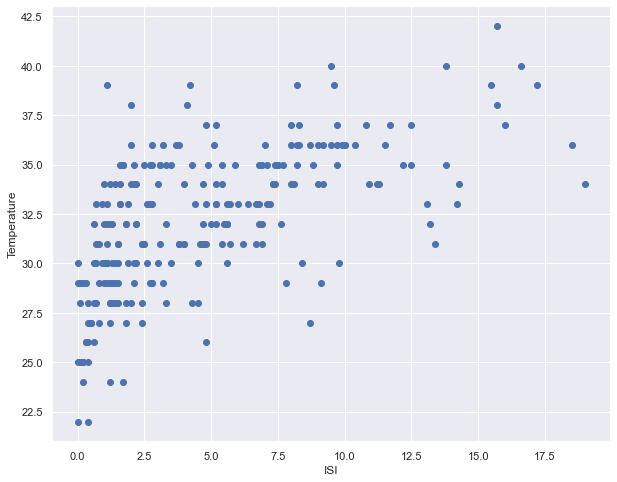

In [101]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(df['ISI'], df['Temperature'])
plt.xlabel('ISI')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

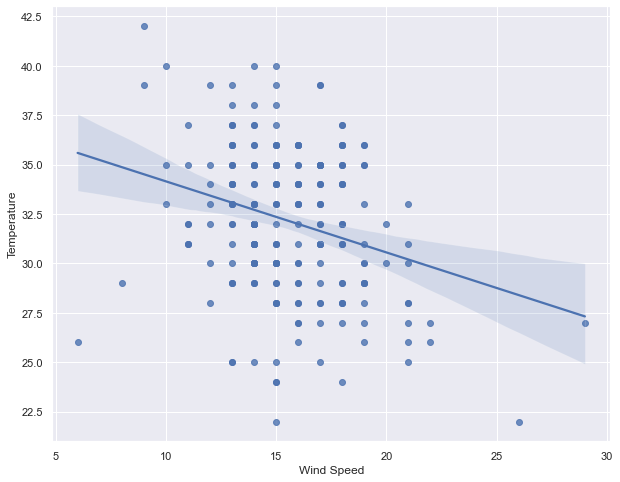

In [102]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x='Ws', y='Temperature', data=df)
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

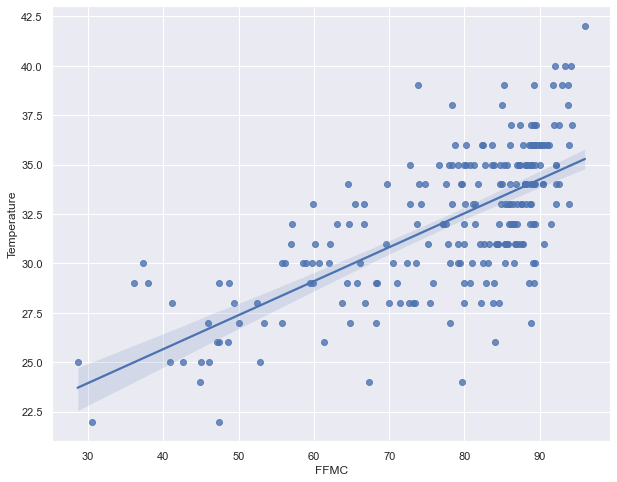

In [103]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x='FFMC', y='Temperature', data=df)
plt.xlabel('FFMC')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

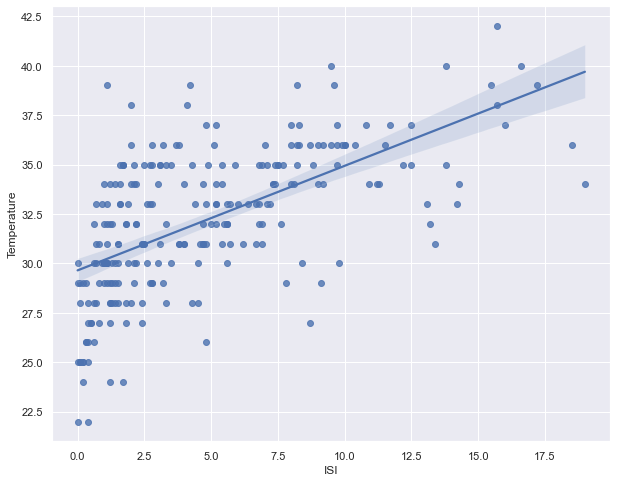

In [104]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x='ISI', y='Temperature', data=df)
plt.xlabel('ISI')
plt.ylabel('Temperature')

In [105]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1,2012-06-01
1,29.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1,2012-06-02
2,26.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1,2012-06-03
3,25.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1,2012-06-04
4,27.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1,2012-06-05


In [106]:
## Independent and Dependent feature
# Removing 'date' column from features as it is not related

X = df.iloc[:, 1:-1]
y = df.iloc[:,:1]

In [107]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,1
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,1
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,1
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,1
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,1


In [108]:
y = y.squeeze()
y

0      29.0
1      29.0
2      26.0
3      25.0
4      27.0
       ... 
241    30.0
242    28.0
243    27.0
244    24.0
245    24.0
Name: Temperature, Length: 244, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=10)

In [111]:
X_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,0.0,0
78,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,1.0,1
25,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1.0,1
126,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0.0,0
178,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
64,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1.0,1
15,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,0.0,1
230,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1.0,0
127,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0.0,0


In [112]:
y_train

239    26.0
78     36.0
25     31.0
126    29.0
178    39.0
       ... 
64     34.0
15     29.0
230    32.0
127    30.0
9      28.0
Name: Temperature, Length: 163, dtype: float64

In [113]:
X_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
164,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0.0,0
60,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,1.0,1
61,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,0.0,1
63,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,0.0,1
69,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
171,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,1.0,0
234,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1.0,0
146,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,0.0,0
210,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1.0,0


In [114]:
y_test

164    34.0
60     35.0
61     36.0
63     35.0
69     35.0
       ... 
171    33.0
234    29.0
146    33.0
210    33.0
105    22.0
Name: Temperature, Length: 81, dtype: float64

In [115]:
X_train.shape

(163, 11)

In [116]:
y_train.shape

(163,)

In [117]:
X_test.shape

(81, 11)

In [118]:
y_test.shape

(81,)

### Standardize or feature scaling the dataset

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    float64       
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    float64       
 11  Region       244 non-null    int64         
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int32(2), int64(1)
memory usage: 32.9 KB


In [121]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.85589384,
        -1.06992376, -0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ...,  1.21984339,
         0.93464604,  1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.4926743 ,
         0.93464604,  1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.38690425,
         0.93464604, -0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.7765663 ,
        -1.06992376, -0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.78978756,
        -1.06992376,  1.01857744]])

In [122]:
X_test = scaler.transform(X_test)
X_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01, -8.21325921e-01,
        -7.33442383e-01, -6.82030988e-01, -8.03008814e-01,
        -1.06992376e+00, -9.81761387e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00,  2.03374779e+00,
         4.94418103e-01,  1.72378441e+00,  1.16695836e+00,
         9.34646039e-01,  1.01857744e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -8.06652268e-01,
        -6.38991577e-01, -8.28897625e-01, -7.89787558e-01,
        -1.06992376e+00,  1.01857744e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -8.10844740e-01,
        -7.09829682e-01, -7.72948430e-01, -8.03008814e-01,
        -1.06992376e+00,  1.01857744e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  1.74386276e-01,
  

## Model Training

In [172]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression

LinearRegression()

In [173]:
regression.fit(X_train, y_train)

LinearRegression()

#### Printing the coefficient

In [174]:
regression.coef_

array([-1.30880436, -0.54088477, -0.22884774,  0.86804983,  0.49713431,
        0.72246443,  0.38337784, -0.59654515, -0.44787523,  0.21389385])

#### Printing the intercept

In [175]:
regression.intercept_

32.17791411042945

#### Prediction for test data

In [177]:
reg_pred = regression.predict(X_test)
reg_pred

array([ 21.62972966, 107.24655154,  41.42694477,  15.64556835,
        57.91610825, 133.09535161,  92.63825771, 121.55405487,
        27.37954776,  41.67957872,  63.73272259, -23.72071215,
        84.55915238,  -7.48658981,  36.02455879,  23.12539246,
        45.82845623, -33.77613964,  85.17433308,  80.33285485,
        48.14134163, 129.20172833,  80.71576243,  40.57978421,
        80.81351494, -25.58657003,  72.18820038,  36.32321619,
       -35.16169954,  82.13675866, -38.96060771, -50.55952534,
        50.93023389,  29.61058202,  56.43384   ,  10.90230246,
       -10.97019855,  27.31796172, -39.41049363, 109.29083624,
        92.14403708,  72.23527354,  62.71170198,  13.2404844 ,
        94.00449335,  72.2339298 , -36.40219292,  57.68952479,
        56.59473329, -17.08247686,  14.00701629,  37.71106694,
       132.51578642,  23.6455008 ,  17.14656417,  11.00634708,
        72.49228719,  88.68658524,  41.3007731 ,  56.21861793,
        50.26137864,  84.87352118,   6.32093458, -44.32

### Assumptions on Linear Regression

Text(0, 0.5, 'Test Predicted Data')

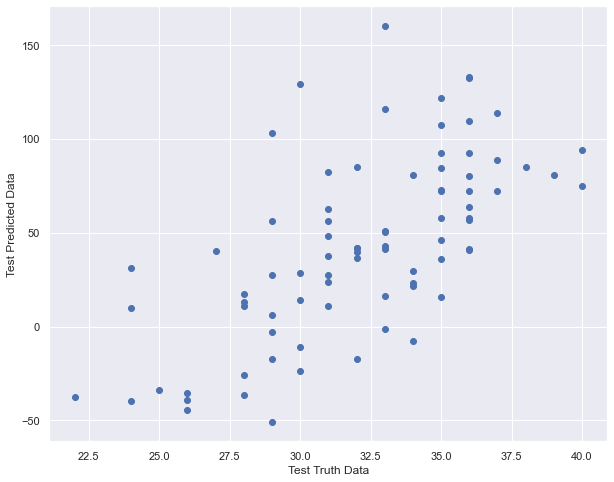

In [178]:
plt.scatter(y_test, reg_pred)
plt.xlabel('Test Truth Data')
plt.ylabel('Test Predicted Data')

Observation :


In [179]:
# Residuals 

residuals = y_test - reg_pred
residuals

164     12.370270
60     -72.246552
61      -5.426945
63      19.354432
69     -22.916108
          ...    
171     -9.840075
234    -74.007695
146     16.734834
210   -126.889210
105     59.349906
Name: Temperature, Length: 81, dtype: float64

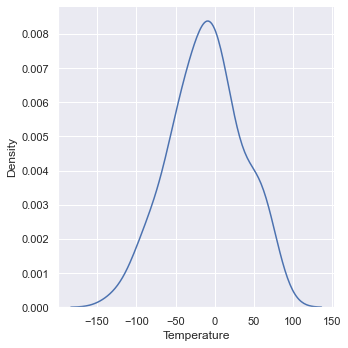

In [180]:
sns.displot(residuals, kind='kde')

#### Observation : 
- We got approx a normal distribution

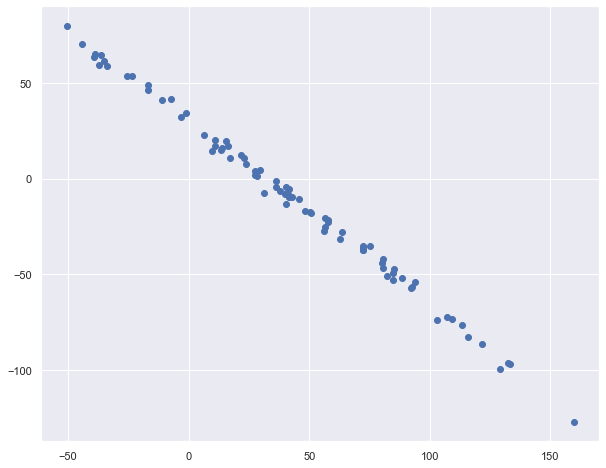

In [181]:
# Scatter plot with predictions and residual
# Uniform distribution

plt.scatter(reg_pred, residuals)

# Homosedacity

#### Observation :
- There is a negative correlation

In [182]:
# performance Matrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

2163.2762459122882
37.21371595728874
46.51103359324848


#### R squared and Adjusted R squared

In [183]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

-142.05121499557063


#### Observation :
- This model is a bad model

In [184]:
## Adjusted R squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-162.4871028520807

## Ridge

In [185]:


from sklearn.linear_model import Ridge
ridge = Ridge()

In [188]:
# Training dataset

ridge.fit(X_train, y_train)

Ridge()

In [192]:
ridge_pred = ridge.predict(X_test)

### Assumption on Ridge Linear Regression 
##### 1st Assumption

Text(0, 0.5, 'Test Predicted Data')

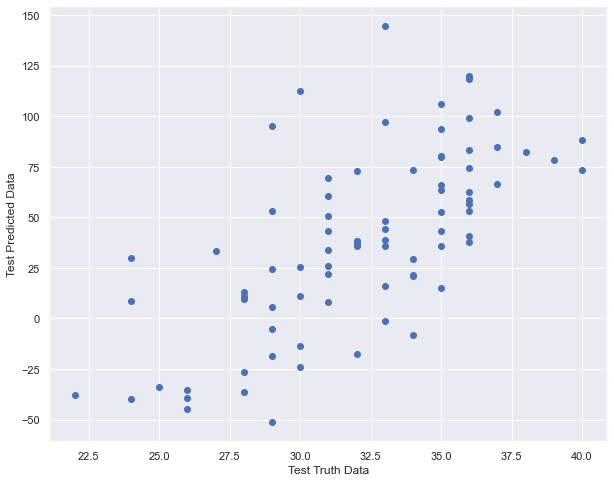

In [193]:
plt.scatter(y_test, ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

##### 2nd Assumption

In [196]:
# residuals

residuals = y_test - ridge_pred

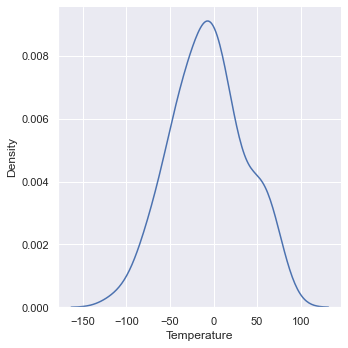

In [197]:
sns.displot(residuals, kind='kde')

#### Observation :
- We got approx a normal distribution

##### 3rd Assumption

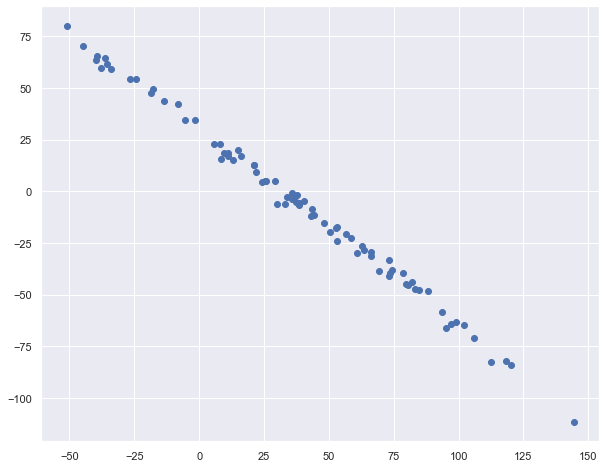

In [198]:
# Scatter plot with predictions and residual
# Uniform distribution

plt.scatter(ridge_pred, residuals)

# Homosedacity

#### Observation :
- There is a negative correlation    

In [200]:
# performance Matrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, ridge_pred))
print(mean_absolute_error(y_test, ridge_pred))
print(np.sqrt(mean_squared_error(y_test, ridge_pred)))

1760.5073920874001
33.70407794138636
41.958400733195255


#### R squared and Adjusted R squared

In [201]:
from sklearn.metrics import r2_score
score = r2_score(y_test, ridge_pred)
print(score)

-115.4172730702638


#### Observation :
- This model is a bad model

In [202]:
## Adjusted R squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-132.04831208030149

## Lasso

In [204]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso

Lasso()

In [205]:
lasso.fit(X_train, y_train)

Lasso()

In [206]:
lasso_pred = lasso.predict(X_test)

### Assumption of Lasso Linear Regression
#### 1st Assumption

Text(0, 0.5, 'Test Predicted Data')

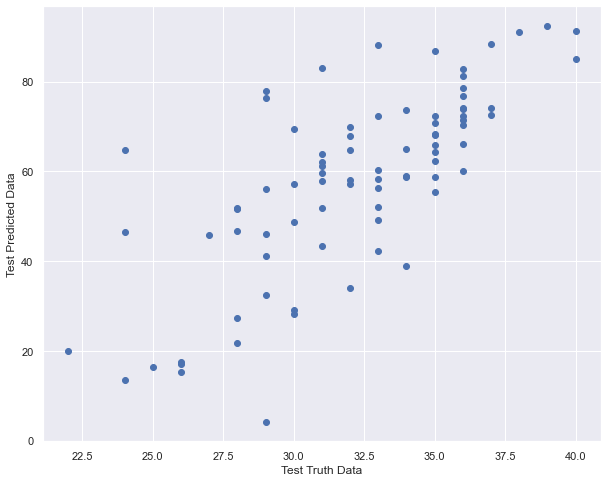

In [207]:
plt.scatter(y_test, lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

#### 2nd Assumption

In [209]:
# residuals

residuals = y_test - lasso_pred

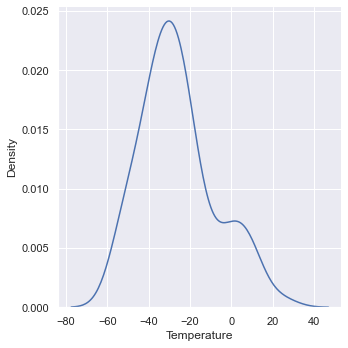

In [210]:
sns.displot(residuals, kind='kde')

#### Observation :
- We got approx a normally distributed plot but there are some outliers in the right side

#### 3rd Assumption

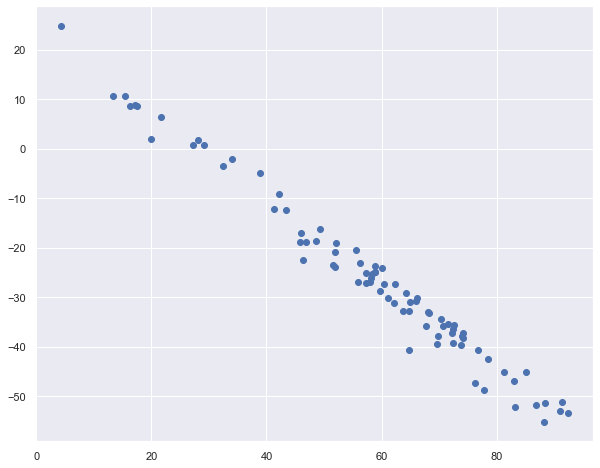

In [211]:
# Scatter plot with predictions and residual
# Uniform distribution

plt.scatter(lasso_pred, residuals)

# Homosedacity

#### Observation :
- There is a negative correlation

In [212]:
# performance Matrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, lasso_pred))
print(mean_absolute_error(y_test, lasso_pred))
print(np.sqrt(mean_squared_error(y_test, lasso_pred)))

988.7916235597395
28.02852444823308
31.445057219851574


#### R squared and Adjusted R squared

In [213]:
from sklearn.metrics import r2_score
score = r2_score(y_test, lasso_pred)
print(score)

-64.38593644475247


In [214]:
## Adjusted R squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-73.72678450828855

## Elastic net

In [215]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic

ElasticNet()

In [216]:
elastic.fit(X_train, y_train)

ElasticNet()

In [217]:
# prediction for test data

elastic_pred = elastic.predict(X_test)

### Assumptions of linear regression
#### 1st Assumption

Text(0, 0.5, 'Test Predicted Data')

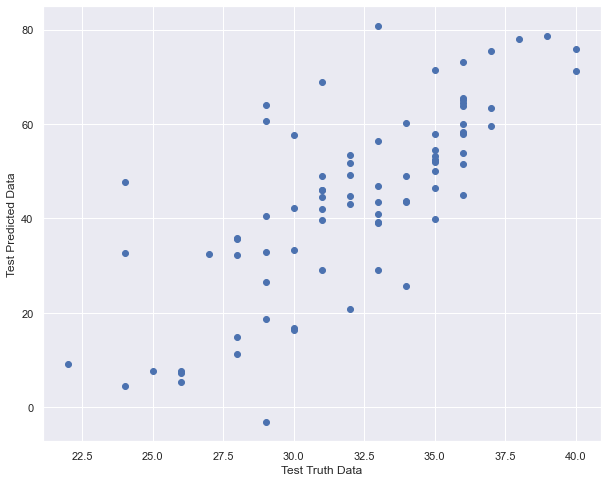

In [218]:
plt.scatter(y_test, elastic_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [220]:
# residuals

residuals = y_test - elastic_pred

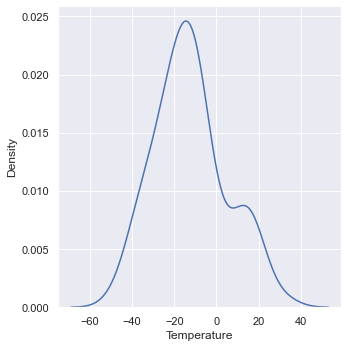

In [221]:
sns.displot(residuals, kind='kde')

#### Observation :
- We got approx normal distribution

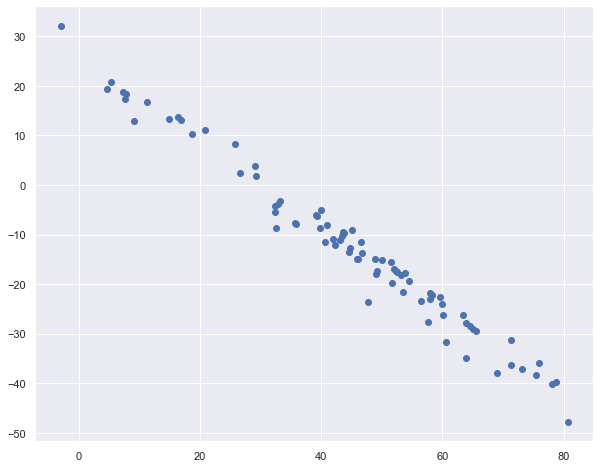

In [222]:
# Scatter plot with predictions and residual
# Uniform distribution

plt.scatter(elastic_pred, residuals)

# Homosedacity

#### Observation :
- There is negative correlation

In [223]:
# performance Matrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, elastic_pred))
print(mean_absolute_error(y_test, elastic_pred))
print(np.sqrt(mean_squared_error(y_test, elastic_pred)))

437.60962945249884
18.164357788144738
20.919121144362133


#### R squared and Adjusted R squared

In [224]:
from sklearn.metrics import r2_score
score = r2_score(y_test, elastic_pred)
print(score)

-27.93786186818768


#### Observation :
This is bad model

In [225]:
## Adjusted R squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-32.071842135071634